In [ ]:
# gpu : 많은 연산을 효율적으로 처리

In [ ]:
# konlpy : 한글 형태소 분류기
# 자바에 기반을 가지고있는 기능, 파이썬에서 사용하려면 자바와 연결하는 여러가지 설치

In [ ]:
!pip install konlpy
from konlpy.tag import Kkma
kkma = Kkma()
kkma.morphs('아버지가 방에 들어가신다')

In [3]:
# Colab 사용 이유
# 무료로 일정 수준의 GPU 사용 가능
# 환경설정이 거의 되어있음

In [43]:
from tensorflow.keras.datasets import mnist
((X_train,y_train) , (X_test,y_test)) = mnist.load_data()

In [44]:
X_train.shape
# 6만개의 그림
# 가로 28 세로 28 픽셀의 크기를 가지고 있다`

(60000, 28, 28)

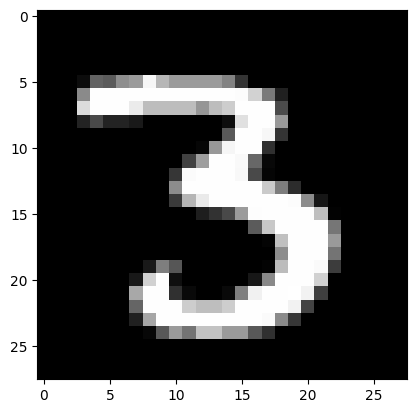

In [57]:
# 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[12], cmap = 'gray')
plt.show()

In [ ]:
# 0 = 검은색
# 255 = 흰색
X_train[0]

In [58]:
# 데이터 차원 변환
# 2차원 > 1차원 : Dense층에 학습하기위한 형태는 1차원이여야함
X_train = X_train.reshape((60000,28*28))
X_test = X_test.reshape((10000,28*28))
X_train.shape

(60000, 784)

In [59]:
# 이미지 픽셀값 수정
# 0 ~ 255(정수) > 0 ~ 1(실수) 로 변환
# 분산을 줄이면 오차가 줄어듦
# 정수 > 실수로 변환되어서 기존의 의미도 표현 가능
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

In [ ]:
X_train[0]

In [18]:
# 정답이 0 ~ 9, 총 10개인 다중분류
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [60]:
# 다중분류시 y값은 원핫인코딩을 해줘야함
import pandas as pd
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [20]:
# 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model1 = Sequential()

# 입력층
model1.add(Dense(units = 32, input_dim = 784, activation = 'sigmoid'))

# 중간층 = 은닉층
model1.add(Dense(64,'sigmoid'))
model1.add(Dense(128,'sigmoid'))
model1.add(Dense(64,'sigmoid'))

# 출력층
model1.add(Dense(10, 'softmax'))

In [22]:
model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'SGD',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(X_train,y_train,
           epochs = 40, validation_split = 0.3)
# epochs = 40

In [ ]:
model2 = Sequential()

# 입력층
model2.add(Dense(units = 32, input_dim = 784, activation = 'sigmoid'))

# 중간층 = 은닉층
model2.add(Dense(64,'sigmoid'))
model2.add(Dense(128,'sigmoid'))
model2.add(Dense(128,'sigmoid'))
model2.add(Dense(64,'sigmoid'))

# 출력층
model2.add(Dense(10, 'softmax'))

model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'SGD',
    metrics = ['accuracy']
)
# 결과가 안좋음
model2.fit(X_train,y_train,
           epochs = 40, validation_split = 0.3)

In [ ]:
model3 = Sequential()

# 입력층
model3.add(Dense(units = 32, input_dim = 784, activation = 'relu'))

# 중간층 = 은닉층
model3.add(Dense(64,'relu'))
model3.add(Dense(128,'relu'))
model3.add(Dense(64,'relu'))

# 출력층
model3.add(Dense(10, 'softmax'))

model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'SGD',
    metrics = ['accuracy']
)

model3.fit(X_train,y_train,
           epochs = 40, validation_split = 0.3)

In [ ]:
model4 = Sequential()

# 입력층
model4.add(Dense(units = 32, input_dim = 784, activation = 'sigmoid'))

# 중간층 = 은닉층
model4.add(Dense(64,'sigmoid'))
model4.add(Dense(128,'sigmoid'))
model4.add(Dense(64,'sigmoid'))

# 출력층
model4.add(Dense(10, 'softmax'))

model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

model4.fit(X_train,y_train,
           epochs = 40, validation_split = 0.3)

In [27]:
model5 = Sequential()

# 입력층
model5.add(Dense(units = 32, input_dim = 784, activation = 'relu'))

# 중간층 = 은닉층
model5.add(Dense(64,'relu'))
model5.add(Dense(128,'relu'))
model5.add(Dense(64,'relu'))

# 출력층
model5.add(Dense(10, 'softmax'))

model5.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

model5.fit(X_train,y_train,
           epochs = 20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 10s 6ms/step - loss: 0.3654 - accuracy: 0.8891 - val_loss: 0.1941 - val_accuracy: 0.9424
Epoch 2/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1744 - accuracy: 0.9461 - val_loss: 0.1798 - val_accuracy: 0.9458
Epoch 3/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1319 - accuracy: 0.9596 - val_loss: 0.1653 - val_accuracy: 0.9526
Epoch 4/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1070 - accuracy: 0.9674 - val_loss: 0.1467 - val_accuracy: 0.9579
Epoch 5/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0914 - accuracy: 0.9716 - val_loss: 0.1389 - val_accuracy: 0.9615
Epoch 6/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0797 - accuracy: 0.9746 - val_loss: 0.1295 - val_accuracy: 0.9649
Epoch 7/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0691 - accuracy: 0.9782 - val_loss: 0.1315 - val_accuracy

In [ ]:
# 직접 그린 손글씨 불러오기

In [28]:
import PIL.Image as pimg

In [30]:
img = pimg.open('/content/3.gif')

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [ ]:
# 흰색(255)과 검은색(0) 바꾸기

In [32]:
num = np.array(img)
num
# 255 > 0
# 0 > 255
# 100 > 155
# 150 > 105

array([[251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 153,  49,   0,   0,
          0,   0,   0,  43, 153, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 196,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 153, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 202,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 196,   0,   0,   0,   0,   0,  98, 251,
        251, 251, 147,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251,   6,   0,   0,   0,  98, 251, 251, 251,
        251, 251, 251,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 147,   0,   0, 104, 251, 251, 251, 251,
        251, 251, 196,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 153,   0,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 196,
          6,   0,   0,   0,   0,  98, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 202,   0,   0,   0,
          0,   0,   0,   0,   0,  49, 153, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 153, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 153,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 147,   0,   0,   0, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251,   0,   0,   0, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 196,   0,   0,   0, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 202,   0,   0,   0,   0, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 153,   0,   0,   0,   0,  98, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 196,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  98, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 104, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 147,   0,   0,   0,   0,
          0,   0,   0,   0,  98, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 25

In [33]:
num = 255 - num

In [36]:
# 손글씨 확인하기
num

array([[  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4, 102, 206, 255, 255,
        255, 255, 255, 212, 102,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,  59, 249, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 102,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,  53, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,  59, 255, 255, 255, 255, 255, 157,   4,
          4,   4, 108, 255, 255, 255,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4, 249, 255, 255, 255, 157,   4,   4,   4,
          4,   4,   4, 255, 255, 255,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4, 108, 255, 255, 151,   4,   4,   4,   4,
          4,   4,  59, 255, 255, 255,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4, 102, 255, 255, 255, 255,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,  59,
        249, 255, 255, 255, 255, 157,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,  53, 255, 255, 255,
        255, 255, 255, 255, 255, 206, 102,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 102,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4, 102, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4, 108, 255, 255, 255,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,   4, 255, 255, 255,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,  59, 255, 255, 255,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,  53, 255, 255, 255, 255,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4, 102, 255, 255, 255, 255, 157,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,  59, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 157,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4, 249, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 151,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4, 108, 255, 255, 255, 255,
        255, 255, 255, 255, 157,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4],
       [  4,   4,   4,   4,   4,   4,   

In [37]:
# 손글씨 예측하기
# 차원 수정 : 2차원 > 1차원
num = num.reshape(1,784)
# 픽셀값 수정 : 0 ~ 255(정수) > 0 ~ 1(실수)
num = num.astype('float')/255

In [39]:
# argmax() : 최대값의 위치 반환
model5.predict(num).argmax()

1/1 [==============================] - 0s 21ms/step


3

In [ ]:
# 학습시 정답률 : train : 0.99, validation : 0.96
# 직접 확인시 정답률 : 5/11 = 0.45
# 실제 결과와 차이가 많이남
# 1. 학습 이미지와 예측 이미지의 모양이 차이가 많이남
#    학습이미지는 일정한 크기에 중간에 이미지가 몰려있음
# 2. 2차원을 1차원으로 변경하면서 모양이 가지는 의미가 사라짐 > 정보의 손실